# CatBoost Vs XGBoost Vs LightGBM 

In [105]:
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

In [107]:
import numpy as np
import pandas as pd
import time

df = pd.read_csv('LE.csv')
# df = df [['Country','Year','Status','Life expectancy']]

In [109]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [113]:
X = df.drop(columns='Life expectancy')
y = df['Life expectancy']

In [115]:
X.shape

(2928, 21)

# Lets apply XGBOOST

* Required Mannual Data Encoding
* 

In [118]:
import xgboost as xgb
from sklearn import preprocessing

lbl = preprocessing.LabelEncoder()             #Country', 'Year','Status - str we have to conver mannualy into a number

X['Country'] = lbl.fit_transform(X['Country'].astype(str))
X['Year'] = lbl.fit_transform(X['Year'].astype(str))
X['Status'] = lbl.fit_transform(X['Status'].astype(str))


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

start = time.time()
#X_train["Species"].astype("category")
xgbr = xgb.XGBRegressor()

xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

# Calculate the R-squared value
xgb_r2 = r2_score(y_test, y_pred)
print("R Squared for XGBoost: ", xgb_r2)

# Calculate execution time
diff = time.time() - start
print('Execution time:', diff)

R Squared for XGBoost:  0.9597320918992238
Execution time: 0.16901516914367676


# LightGBM
* it wil take care of object type just need to tell that its category

In [122]:
import lightgbm
X = df.drop(columns='Life expectancy')
y = df['Life expectancy']
obj_feat = list(X.loc[:, X.dtypes == 'object'].columns.values)

for feature in obj_feat:
    X[feature] = pd.Series(X[feature], dtype="category")

start = time.time()

lgbmr = lightgbm.LGBMRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=1)

lgbmr.fit(X_train, y_train)
y_pred = lgbmr.predict(X_test)

lgbm_rsquared = r2_score(y_test, y_pred)
print()
print("R squared for LightGBM: ", lgbm_rsquared)

end = time.time()
diff = end - start
print('Execution time:', diff)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3522
[LightGBM] [Info] Number of data points in the train set: 2342, number of used features: 21
[LightGBM] [Info] Start training from score 69.262724

R squared for LightGBM:  0.9662101099759252
Execution time: 0.12861108779907227


# CATBOOST
* This is best if feature has many object types - manage too well as per microsoft team
* To managee object we have <b>pool</b> here


In [133]:
from catboost import CatBoostRegressor, Pool

X = df.drop(columns='Life expectancy')
y = df['Life expectancy']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

pool_train = Pool(X_train, y_train, cat_features = ['Country','Year','Status'])

pool_test = Pool(X_test, cat_features = ['Country','Year','Status'])


#CatBoost

import time

start = time.time()

cbr = CatBoostRegressor(iterations=100,max_depth=2)

cbr.fit(pool_train)
y_pred = cbr.predict(X_test)

from sklearn.metrics import r2_score as RSquared


cb_rsquared = r2_score(y_test, y_pred)
print("R Squared for CatBoost: ",(cb_rsquared))

end = time.time()
diff = end - start
print('Execution time:', diff)


Learning rate set to 0.304491
0:	learn: 7.9025775	total: 1.1ms	remaining: 109ms
1:	learn: 6.6171156	total: 1.65ms	remaining: 80.7ms
2:	learn: 5.7048219	total: 2.45ms	remaining: 79.3ms
3:	learn: 5.0759920	total: 3.55ms	remaining: 85.1ms
4:	learn: 4.6535935	total: 4.4ms	remaining: 83.6ms
5:	learn: 4.3251864	total: 4.92ms	remaining: 77.1ms
6:	learn: 4.0517530	total: 5.42ms	remaining: 71.9ms
7:	learn: 3.8478164	total: 5.95ms	remaining: 68.4ms
8:	learn: 3.6603305	total: 6.56ms	remaining: 66.3ms
9:	learn: 3.5540215	total: 7.01ms	remaining: 63.1ms
10:	learn: 3.4172624	total: 7.52ms	remaining: 60.8ms
11:	learn: 3.3573197	total: 7.89ms	remaining: 57.9ms
12:	learn: 3.2889161	total: 8.4ms	remaining: 56.3ms
13:	learn: 3.2534722	total: 9.12ms	remaining: 56ms
14:	learn: 3.2195159	total: 9.65ms	remaining: 54.7ms
15:	learn: 3.1754573	total: 10.1ms	remaining: 53.1ms
16:	learn: 3.1537368	total: 10.6ms	remaining: 51.9ms
17:	learn: 3.1129730	total: 11.2ms	remaining: 50.9ms
18:	learn: 3.0919768	total: 11.6

# 1. Community support/Performance/Want to tune - XGBOOST
# 2. Hurry to train/Performance/Dont want to tune - LightGBM
# 3. More categorical, GPU, Large data - CatBoost

| **Feature**                     | **XGBoost**                                      | **LightGBM**                                 | **CatBoost**                                    |
|----------------------------------|--------------------------------------------------|----------------------------------------------|-------------------------------------------------|
| **Tree Construction**           | Depth-wise growth (expands all nodes at each level) | Leaf-wise growth (splits leaf nodes with highest loss) | Symmetric tree growth (balanced splits)          |
| **Categorical Feature Handling** | Requires manual encoding                        | Natively supports categorical features       | Automatically handles categorical features       |
| **Speed and Efficiency**        | Slower for large datasets, but highly efficient for medium-sized ones | Fast for large datasets, especially with high cardinality | Slower compared to LightGBM but efficient for categorical-heavy data |
| **Memory Usage**                | Moderate, as it builds deeper trees              | Lower, due to histogram-based binning        | Higher memory usage but optimized for categorical data |
| **Performance on Large Datasets**| Good, but slower compared to LightGBM            | Best performance with large datasets         | Good, especially with mixed data types (numerical + categorical) |
| **Overfitting Risk**            | Medium, requires regularization                 | Lower risk of overfitting with early stopping | Low, due to ordered boosting method              |
| **Best Use Case**               | When precision and flexibility are needed for smaller-medium datasets | When speed and large dataset handling are critical | When categorical features dominate in the dataset |


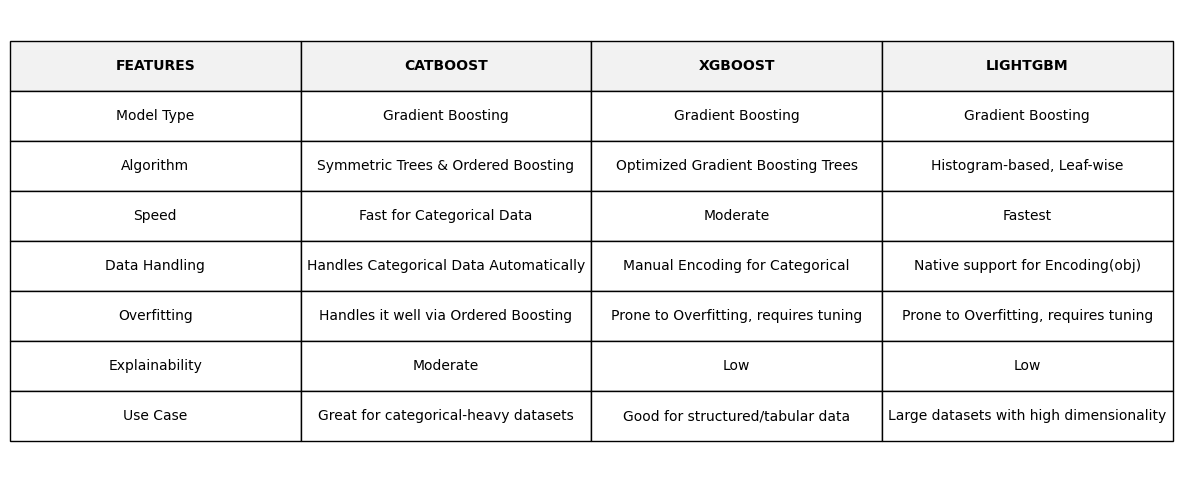

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Features": [
        "Model Type", "Algorithm", "Speed", "Data Handling", "Overfitting",
        "Explainability", "Use Case"
    ],
    "CatBoost": [
        "Gradient Boosting", "Symmetric Trees & Ordered Boosting",
        "Fast for Categorical Data", "Handles Categorical Data Automatically",
        "Handles it well via Ordered Boosting",
        "Moderate", "Great for categorical-heavy datasets"
    ],
    "XGBoost": [
        "Gradient Boosting", "Optimized Gradient Boosting Trees",
        "Moderate", "Manual Encoding for Categorical",
        "Prone to Overfitting, requires tuning",
        "Low", "Good for structured/tabular data"
    ],
    "LightGBM": [
        "Gradient Boosting", "Histogram-based, Leaf-wise",
        "Fastest", "Native support for Encoding(obj)",
        "Prone to Overfitting, requires tuning",
        "Low", "Large datasets with high dimensionality"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot the table with better formatting
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size for spacing
ax.axis("tight")
ax.axis("off")

# Use a table with proper formatting and wrap text
table = ax.table(
    cellText=df.values,
    colLabels=[col.upper() for col in df.columns],  # Convert headers to uppercase
    loc="center",
    cellLoc="center",
    colLoc="center"
)

# Adjust the font size, cell padding, and text wrapping
table.auto_set_font_size(False)
table.set_fontsize(10)  # Adjust font size
table.scale(1.5, 3)  # Adjust cell size

# Iterate through cells to add padding and wrap text
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor("black")  # Add black borders
    cell.set_linewidth(1)  # Thickness of borders
    cell.PAD = 0.5  # Add padding inside cells
    
    # Make the header bold and uppercase
    if row == 0:  # Header row
        cell.set_text_props(weight="bold")  # Make text bold
        cell.set_facecolor("#f2f2f2")  # Light gray background for the header

# Save the table as an image
plt.savefig("comparison_table_wrapped.png", dpi=300, bbox_inches="tight")
plt.show()
